In [1]:
from Sudoku import Sudoku
from classification import gen_data

sudoku = Sudoku(grid_size=2, difficulty=0.2)

sudoku._init_quantum(simple=False,pattern=True)
circuit = sudoku.quantum.get_circuit()
sudoku.quantum.find_resources()

In [19]:
sudoku.quantum.draw_circuit()

In [ ]:
from pytket.extensions.qiskit import AerBackend
from pytket.passes import FlattenRegisters
from pytket.utils import probs_from_counts

In [4]:

backend = AerBackend()
flatten = FlattenRegisters()
flatten.apply(circuit)
compiled_circ = backend.get_compiled_circuit(circuit)

handle = backend.process_circuit(compiled_circ, n_shots=100)
counts = backend.get_result(handle).get_counts()

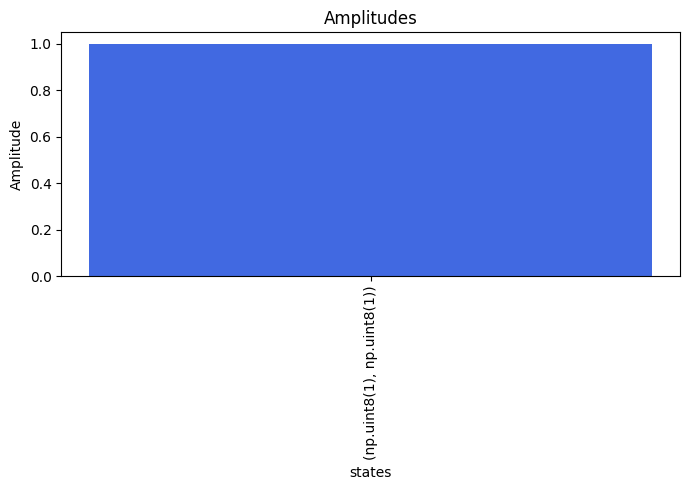

In [5]:
import matplotlib.pyplot as plt

data = probs_from_counts(counts)

# Extract keys and values
keys = list(data.keys())
values = list(data.values())

# Convert keys to string representation for plotting
keys_str = [str(key) for key in keys]

# Create the bar plot
plt.figure(figsize=(7, 5))
plt.bar(keys_str, values, color='royalblue')

# Add title and labels
plt.title('Amplitudes')
plt.xlabel('states')
plt.ylabel('Amplitude')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()